In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
data = pd.read_csv('Data_Train.csv')

In [4]:
data.head()

,Unnamed: 0,ID,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,0,5274,08/07/2018,2266,17,27.4,44,1.7,2000,14.0,1.17,0.0,0.0,Yes
1,1,1185,19/01/2018,648,8,-2.5,50,1.0,1281,-11.5,0.00,0.0,0.0,Yes
2,2,6473,27/08/2018,886,16,24.7,85,1.2,1143,22.0,0.99,0.0,0.0,Yes
3,3,602,26/12/2017,127,1,-1.5,62,1.3,2000,-7.8,0.00,0.0,0.0,Yes
4,4,5656,24/07/2018,735,15,35.8,47,2.2,1029,22.7,1.51,0.0,0.0,Yes


In [5]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

holidays_list = [
    '2018-01-01', '2018-02-15', '2018-02-16', '2018-05-25', '2018-06-14', 
    '2018-06-15', '2018-06-16', '2018-08-20', '2018-08-21', '2018-08-22',
    '2018-08-23', '2018-09-11', '2018-10-02', '2018-10-03', '2018-11-19',
    '2018-11-20', '2018-12-25'
]
holidays_list = pd.to_datetime(holidays_list)

data['Holiday'] = data['Date'].apply(lambda x: 'Holiday' if x in holidays_list else 'No Holiday')

def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Autumn'

data['Seasons'] = data['Date'].apply(get_season)

data.head()

,Unnamed: 0,ID,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Holiday,Seasons
0,0,5274,2018-07-08,2266,17,27.4,44,1.7,2000,14.0,1.17,0.0,0.0,Yes,No Holiday,Summer
1,1,1185,2018-01-19,648,8,-2.5,50,1.0,1281,-11.5,0.00,0.0,0.0,Yes,No Holiday,Winter
2,2,6473,2018-08-27,886,16,24.7,85,1.2,1143,22.0,0.99,0.0,0.0,Yes,No Holiday,Summer
3,3,602,2017-12-26,127,1,-1.5,62,1.3,2000,-7.8,0.00,0.0,0.0,Yes,No Holiday,Winter
4,4,5656,2018-07-24,735,15,35.8,47,2.2,1029,22.7,1.51,0.0,0.0,Yes,No Holiday,Summer


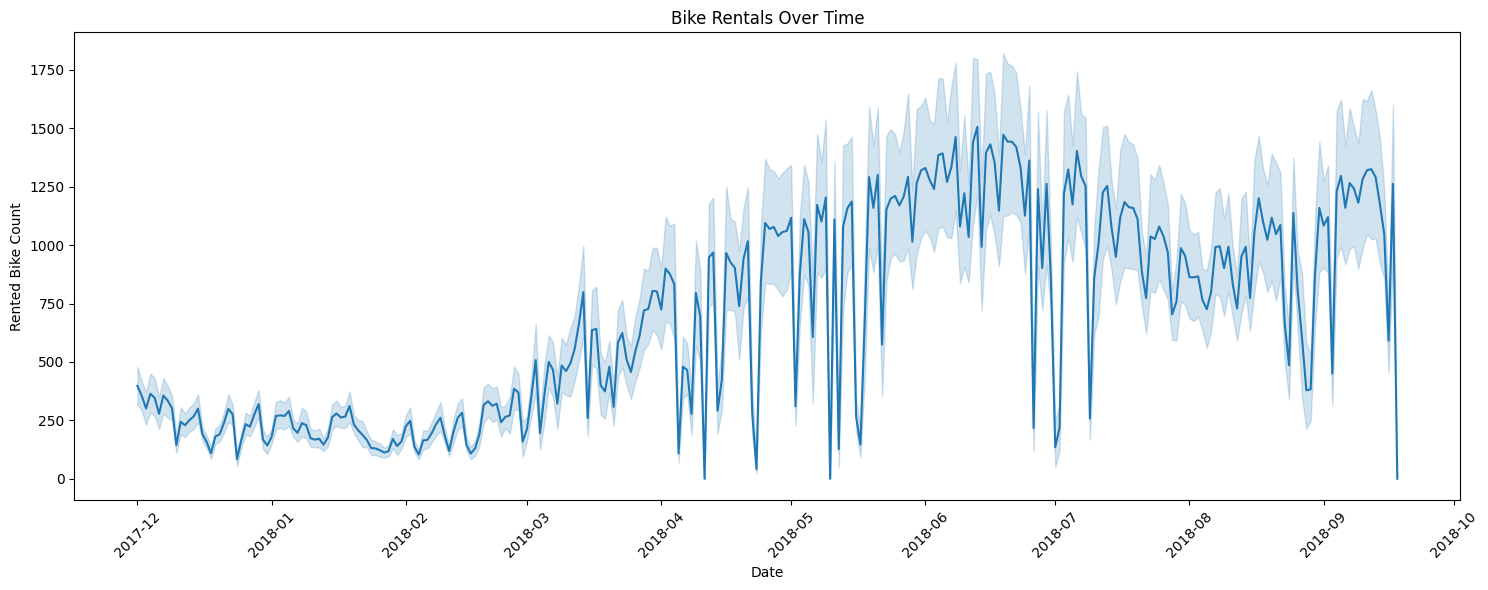

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

plt.figure(figsize=(15, 6))
sns.lineplot(data=data, x='Date', y='Rented Bike Count')
plt.title('Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Rented Bike Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

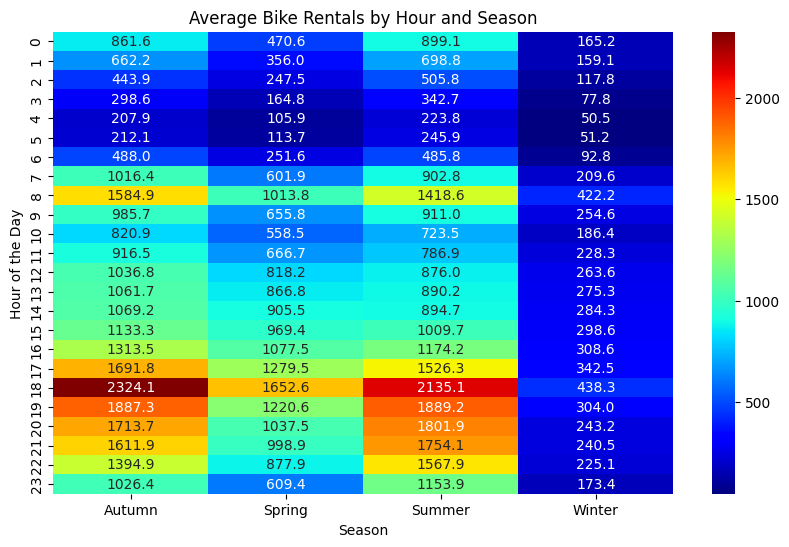

In [7]:
pivot_table = data.pivot_table(values='Rented Bike Count', index='Hour', columns='Seasons', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="jet")
plt.title('Average Bike Rentals by Hour and Season')
plt.xlabel('Season')
plt.ylabel('Hour of the Day')
plt.show()

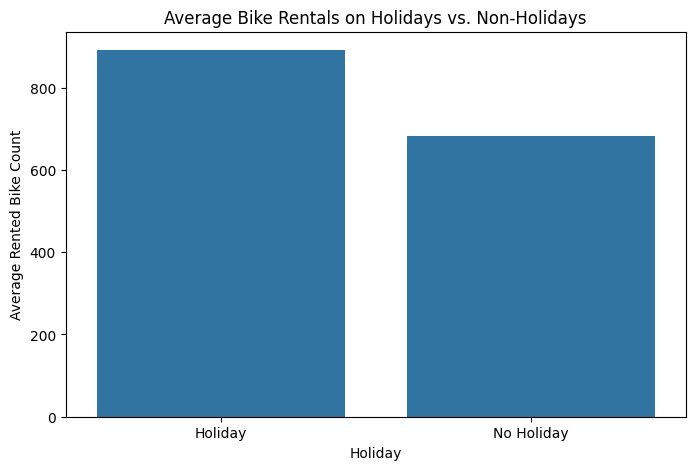

In [8]:
holiday_comparison = data.groupby('Holiday')['Rented Bike Count'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=holiday_comparison, x='Holiday', y='Rented Bike Count')
plt.title('Average Bike Rentals on Holidays vs. Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Average Rented Bike Count')
plt.show()

In [9]:
missing_data = data.isnull().sum()
print(missing_data)

Unnamed: 0                     0
ID                             0
Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)                0
Humidity(%)                    0
Wind speed (m/s)             175
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                 175
Snowfall (cm)                175
Functioning Day                0
Holiday                        0
Seasons                        0
dtype: int64


In [39]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

data[["Wind speed (m/s)", "Rainfall(mm)", "Snowfall (cm)"]] = imputer.fit_transform(
    data[["Wind speed (m/s)", "Rainfall(mm)", "Snowfall (cm)"]]
)

missing_data = data.isnull().sum()
print(missing_data)

Unnamed: 0                   0
ID                           0
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Functioning Day              0
Holiday                      0
Seasons                      0
Day of Week                  0
Month                        0
Is Weekend                   0
dtype: int64


In [40]:
data['Date'] = pd.to_datetime(data['Date'])
data['Rented Bike Count'] = data['Rented Bike Count'].astype(int)
data['Hour'] = data['Hour'].astype(int)
data['Temperature(°C)'] = data['Temperature(°C)'].astype(float)
data['Humidity(%)'] = data['Humidity(%)'].astype(int)
data['Wind speed (m/s)'] = data['Wind speed (m/s)'].astype(float)
data['Visibility (10m)'] = data['Visibility (10m)'].astype(int)
data['Dew point temperature(°C)'] = data['Dew point temperature(°C)'].astype(float)
data['Solar Radiation (MJ/m2)'] = data['Solar Radiation (MJ/m2)'].astype(float)
data['Rainfall(mm)'] = data['Rainfall(mm)'].astype(float)
data['Snowfall (cm)'] = data['Snowfall (cm)'].astype(float)
data['Seasons'] = data['Seasons'].astype('category')
data['Holiday'] = data['Holiday'].astype('category')
data['Functioning Day'] = data['Functioning Day'].astype('category')

In [41]:
data['Day of Week'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data['Is Weekend'] = data['Day of Week'].apply(lambda x: 1 if x >= 5 else 0)

In [42]:
features = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
            'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day',
            'Day of Week', 'Month', 'Is Weekend']
target = 'Rented Bike Count'
X = data[features]
y = data[target]

In [43]:
X = pd.get_dummies(
    X, columns=["Seasons", "Holiday", "Functioning Day"], drop_first=True
)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [46]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [48]:
from sklearn.metrics import r2_score
import numpy as np

def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

In [49]:
# XGBoost Regressor
xgb_preds = xgb_model.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_preds)
xgb_smape = smape(y_test, xgb_preds)

# Random Forest
rf_preds = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_preds)
rf_smape = smape(y_test, rf_preds)

# Gradient Boosting
gb_preds = gb_model.predict(X_test)
gb_r2 = r2_score(y_test, gb_preds)
gb_smape = smape(y_test, gb_preds)

print(f"XGBoost - R2: {xgb_r2 * 100:.2f}%, SMAPE: {xgb_smape:.2f}")
print(f"Random Forest - R2: {rf_r2 * 100:.2f}%, SMAPE: {rf_smape:.2f}")
print(f"Gradient Boosting - R2: {gb_r2 * 100:.2f}%, SMAPE: {gb_smape:.2f}")

XGBoost - R2: 93.41%, SMAPE: 27.16
Random Forest - R2: 92.59%, SMAPE: 22.89
Gradient Boosting - R2: 87.66%, SMAPE: 34.93


In [50]:
import joblib

joblib.dump(xgb_model, "xgb_model.pkl")
joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(gb_model, "gb_model.pkl")

['gb_model.pkl']

In [52]:
%%writefile app.py
import streamlit as st

xgb_model = joblib.load("xgb_model.pkl")
rf_model = joblib.load("rf_model.pkl")
gb_model = joblib.load("gb_model.pkl")

def predict_bike_rentals(model, input_data):
    prediction = model.predict(input_data)
    return prediction


st.title("Bike Rental Prediction")

temperature = st.number_input("Temperature (°C)", value=25.0)
humidity = st.number_input("Humidity (%)", value=60)
windspeed = st.number_input("Wind Speed (m/s)", value=1.0)
hour = st.slider("Hour of the day", 0, 23, 12)

input_data = pd.DataFrame(
    {
        "Hour": [hour],
        "Temperature(°C)": [temperature],
        "Humidity(%)": [humidity],
        "Wind speed (m/s)": [windspeed],
        # Add other required features
    }
)

model_name = st.selectbox(
    "Select model", ["XGBoost", "Random Forest", "Gradient Boosting"]
)
if model_name == "XGBoost":
    model = xgb_model
elif model_name == "Random Forest":
    model = rf_model
else:
    model = gb_model

# Predict
if st.button("Predict"):
    prediction = predict_bike_rentals(model, input_data)
    st.write(f"Predicted Bike Rentals: {int(prediction[0])}")